In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfleft1= pd.read_csv('dim_claims.csv')
dfleft1

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1
...,...,...,...,...,...
1335571,1335572,417740,C,75.0,0
1335572,1335573,999001,C,NaN,1
1335573,1335574,417380,C,70.0,0
1335574,1335575,999001,C,NaN,1


In [4]:
dfleft2= pd.read_csv('bridge.csv')
dfleft2

,dim_claim_id,dim_pa_id,dim_date_id
0,1,1.0,1
1,2,NaN,1
2,3,2.0,1
3,4,NaN,1
4,5,NaN,1
...,...,...,...
1335571,1335572,555950.0,1095
1335572,1335573,NaN,1095
1335573,1335574,555951.0,1095
1335574,1335575,NaN,1095


In [5]:
dfright= pd.read_csv('dim_pa.csv')
dfright

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,1,0,1
1,2,1,0,0,1
2,3,0,0,1,1
3,4,1,1,0,1
4,5,0,1,0,1
...,...,...,...,...,...
555946,555947,1,0,1,0
555947,555948,1,0,1,1
555948,555949,1,1,1,1
555949,555950,1,0,0,1


In [6]:
merge1 = pd.merge(dfleft2, dfright, left_on= "dim_pa_id", right_on="dim_pa_id", how = "right")

In [7]:
print(merge1)

        dim_claim_id  dim_pa_id  dim_date_id  correct_diagnosis  \
0                  1        1.0            1                  1   
1                  3        2.0            1                  1   
2                 10        3.0            1                  0   
3                 11        4.0            1                  1   
4                 15        5.0            1                  0   
...              ...        ...          ...                ...   
555946       1335557   555947.0         1095                  1   
555947       1335558   555948.0         1095                  1   
555948       1335559   555949.0         1095                  1   
555949       1335572   555950.0         1095                  1   
555950       1335574   555951.0         1095                  0   

        tried_and_failed  contraindication  pa_approved  
0                      1                 0            1  
1                      0                 0            1  
2                    

In [8]:
merge2 = pd.merge(dfleft1, merge1, left_on= "dim_claim_id", right_on="dim_claim_id", how = "right")

In [9]:
print(merge2)

        dim_claim_id     bin drug  reject_code  pharmacy_claim_approved  \
0                  1  417380    A         75.0                        0   
1                  3  417740    A         76.0                        0   
2                 10  417380    A         75.0                        0   
3                 11  999001    A         76.0                        0   
4                 15  417614    A         70.0                        0   
...              ...     ...  ...          ...                      ...   
555946       1335557  417380    C         70.0                        0   
555947       1335558  417740    C         75.0                        0   
555948       1335559  417740    C         75.0                        0   
555949       1335572  417740    C         75.0                        0   
555950       1335574  417380    C         70.0                        0   

        dim_pa_id  dim_date_id  correct_diagnosis  tried_and_failed  \
0             1.0           

In [10]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555951 entries, 0 to 555950
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   dim_claim_id             555951 non-null  int64  
 1   bin                      555951 non-null  int64  
 2   drug                     555951 non-null  object 
 3   reject_code              555951 non-null  float64
 4   pharmacy_claim_approved  555951 non-null  int64  
 5   dim_pa_id                555951 non-null  float64
 6   dim_date_id              555951 non-null  int64  
 7   correct_diagnosis        555951 non-null  int64  
 8   tried_and_failed         555951 non-null  int64  
 9   contraindication         555951 non-null  int64  
 10  pa_approved              555951 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 50.9+ MB


In [11]:
merge2.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,dim_pa_id,dim_date_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,417380,A,75.0,0,1.0,1,1,1,0,1
1,3,417740,A,76.0,0,2.0,1,1,0,0,1
2,10,417380,A,75.0,0,3.0,1,0,0,1,1
3,11,999001,A,76.0,0,4.0,1,1,1,0,1
4,15,417614,A,70.0,0,5.0,1,0,1,0,1


In [14]:
df = merge2.drop(["dim_claim_id","dim_pa_id","dim_date_id", "pharmacy_claim_approved" ], axis= 1)

In [15]:
df.head()

,bin,drug,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,417380,A,75.0,1,1,0,1
1,417740,A,76.0,1,0,0,1
2,417380,A,75.0,0,0,1,1
3,999001,A,76.0,1,1,0,1
4,417614,A,70.0,0,1,0,1


<AxesSubplot:xlabel='pa_approved', ylabel='count'>

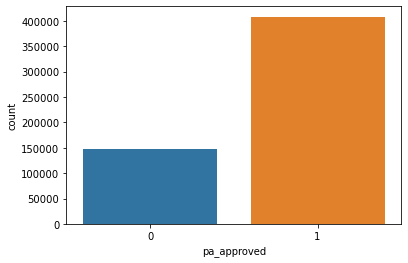

In [16]:
sns.countplot(x= 'pa_approved', data= df)

<AxesSubplot:xlabel='pa_approved', ylabel='count'>

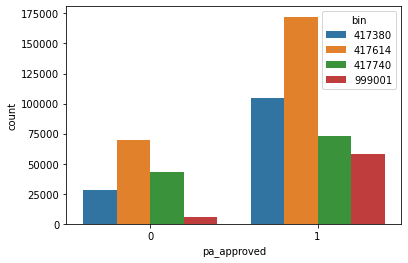

In [17]:
sns.countplot(x= 'pa_approved', hue = 'bin', data= df)

<AxesSubplot:xlabel='pa_approved', ylabel='count'>

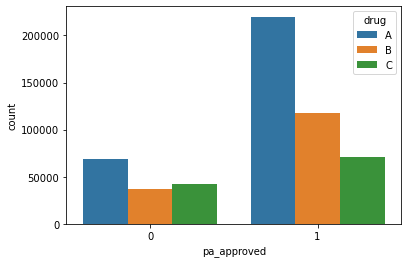

In [18]:
sns.countplot(x= 'pa_approved', hue = 'drug', data= df)

<AxesSubplot:xlabel='pa_approved', ylabel='count'>

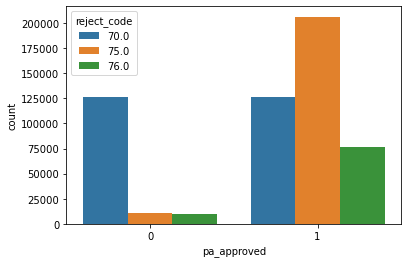

In [19]:
sns.countplot(x= 'pa_approved', hue = 'reject_code', data= df)

<AxesSubplot:xlabel='pa_approved', ylabel='count'>

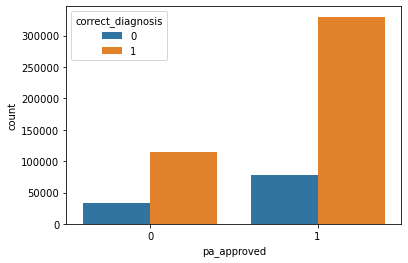

In [20]:
sns.countplot(x= 'pa_approved', hue = 'correct_diagnosis', data= df)

<AxesSubplot:xlabel='pa_approved', ylabel='count'>

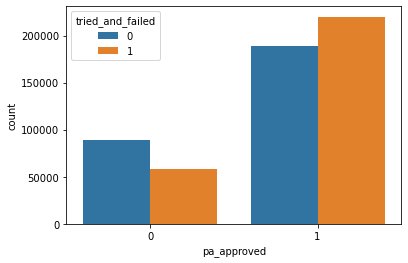

In [21]:
sns.countplot(x= 'pa_approved', hue = 'tried_and_failed', data= df)

<AxesSubplot:xlabel='pa_approved', ylabel='count'>

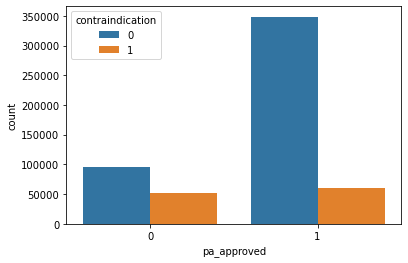

In [22]:
sns.countplot(x= 'pa_approved', hue = 'contraindication', data= df)

In [23]:
df = pd.get_dummies(df, columns= ['bin'])
df

,drug,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved,bin_417380,bin_417614,bin_417740,bin_999001
0,A,75.0,1,1,0,1,1,0,0,0
1,A,76.0,1,0,0,1,0,0,1,0
2,A,75.0,0,0,1,1,1,0,0,0
3,A,76.0,1,1,0,1,0,0,0,1
4,A,70.0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
555946,C,70.0,1,0,1,0,1,0,0,0
555947,C,75.0,1,0,1,1,0,0,1,0
555948,C,75.0,1,1,1,1,0,0,1,0
555949,C,75.0,1,0,0,1,0,0,1,0


In [24]:
df = df.drop(['bin_999001'], axis =1)

df


,drug,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved,bin_417380,bin_417614,bin_417740
0,A,75.0,1,1,0,1,1,0,0
1,A,76.0,1,0,0,1,0,0,1
2,A,75.0,0,0,1,1,1,0,0
3,A,76.0,1,1,0,1,0,0,0
4,A,70.0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
555946,C,70.0,1,0,1,0,1,0,0
555947,C,75.0,1,0,1,1,0,0,1
555948,C,75.0,1,1,1,1,0,0,1
555949,C,75.0,1,0,0,1,0,0,1


In [25]:
df = pd.get_dummies(df, columns= ['drug'])
df

,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved,bin_417380,bin_417614,bin_417740,drug_A,drug_B,drug_C
0,75.0,1,1,0,1,1,0,0,1,0,0
1,76.0,1,0,0,1,0,0,1,1,0,0
2,75.0,0,0,1,1,1,0,0,1,0,0
3,76.0,1,1,0,1,0,0,0,1,0,0
4,70.0,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
555946,70.0,1,0,1,0,1,0,0,0,0,1
555947,75.0,1,0,1,1,0,0,1,0,0,1
555948,75.0,1,1,1,1,0,0,1,0,0,1
555949,75.0,1,0,0,1,0,0,1,0,0,1


In [26]:
df = df.drop(['drug_C'], axis =1)

df

,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved,bin_417380,bin_417614,bin_417740,drug_A,drug_B
0,75.0,1,1,0,1,1,0,0,1,0
1,76.0,1,0,0,1,0,0,1,1,0
2,75.0,0,0,1,1,1,0,0,1,0
3,76.0,1,1,0,1,0,0,0,1,0
4,70.0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
555946,70.0,1,0,1,0,1,0,0,0,0
555947,75.0,1,0,1,1,0,0,1,0,0
555948,75.0,1,1,1,1,0,0,1,0,0
555949,75.0,1,0,0,1,0,0,1,0,0


In [27]:
df = pd.get_dummies(df, columns= ['reject_code'])
df

,correct_diagnosis,tried_and_failed,contraindication,pa_approved,bin_417380,bin_417614,bin_417740,drug_A,drug_B,reject_code_70.0,reject_code_75.0,reject_code_76.0
0,1,1,0,1,1,0,0,1,0,0,1,0
1,1,0,0,1,0,0,1,1,0,0,0,1
2,0,0,1,1,1,0,0,1,0,0,1,0
3,1,1,0,1,0,0,0,1,0,0,0,1
4,0,1,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555946,1,0,1,0,1,0,0,0,0,1,0,0
555947,1,0,1,1,0,0,1,0,0,0,1,0
555948,1,1,1,1,0,0,1,0,0,0,1,0
555949,1,0,0,1,0,0,1,0,0,0,1,0


In [28]:
df = df.drop(['reject_code_76.0'], axis =1)

df

,correct_diagnosis,tried_and_failed,contraindication,pa_approved,bin_417380,bin_417614,bin_417740,drug_A,drug_B,reject_code_70.0,reject_code_75.0
0,1,1,0,1,1,0,0,1,0,0,1
1,1,0,0,1,0,0,1,1,0,0,0
2,0,0,1,1,1,0,0,1,0,0,1
3,1,1,0,1,0,0,0,1,0,0,0
4,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
555946,1,0,1,0,1,0,0,0,0,1,0
555947,1,0,1,1,0,0,1,0,0,0,1
555948,1,1,1,1,0,0,1,0,0,0,1
555949,1,0,0,1,0,0,1,0,0,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555951 entries, 0 to 555950
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   correct_diagnosis  555951 non-null  int64
 1   tried_and_failed   555951 non-null  int64
 2   contraindication   555951 non-null  int64
 3   pa_approved        555951 non-null  int64
 4   bin_417380         555951 non-null  uint8
 5   bin_417614         555951 non-null  uint8
 6   bin_417740         555951 non-null  uint8
 7   drug_A             555951 non-null  uint8
 8   drug_B             555951 non-null  uint8
 9   reject_code_70.0   555951 non-null  uint8
 10  reject_code_75.0   555951 non-null  uint8
dtypes: int64(4), uint8(7)
memory usage: 44.9 MB


In [30]:
X = df.drop(['pa_approved'], axis =1)
X


,correct_diagnosis,tried_and_failed,contraindication,bin_417380,bin_417614,bin_417740,drug_A,drug_B,reject_code_70.0,reject_code_75.0
0,1,1,0,1,0,0,1,0,0,1
1,1,0,0,0,0,1,1,0,0,0
2,0,0,1,1,0,0,1,0,0,1
3,1,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
555946,1,0,1,1,0,0,0,0,1,0
555947,1,0,1,0,0,1,0,0,0,1
555948,1,1,1,0,0,1,0,0,0,1
555949,1,0,0,0,0,1,0,0,0,1


In [31]:
y = df. pa_approved
y

0         1
1         1
2         1
3         1
4         1
         ..
555946    0
555947    1
555948    1
555949    1
555950    0
Name: pa_approved, Length: 555951, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=111,
                                                    stratify=y)

In [33]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
y_pred


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)


[[19644 17264]
 [ 8584 93496]]


In [35]:
metrics.accuracy_score(y_test, y_pred)

0.8140271102541227

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
DT = DecisionTreeClassifier(criterion= 'entropy')

In [38]:
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [39]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

metrics.accuracy_score(y_test, y_pred)

[[18144 18764]
 [ 7093 94987]]


0.8139623564624284

In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion= 'entropy', n_estimators= 100)


RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_pred


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

metrics.accuracy_score(y_test, y_pred)

[[18144 18764]
 [ 7093 94987]]


0.8139623564624284